#### Data Visualization III
#### Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,https://archive.ics.uci.edu/ml/datasets/Iris )

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset using seaborn
iris = sns.load_dataset('iris')

# Show the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### 1.List down the features and their types (e.g., numeric, nominal) available in the dataset.

In [5]:
# Accessing the data types of each column
print(iris.dtypes)


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


#### 2.Create Histograms for Each Feature

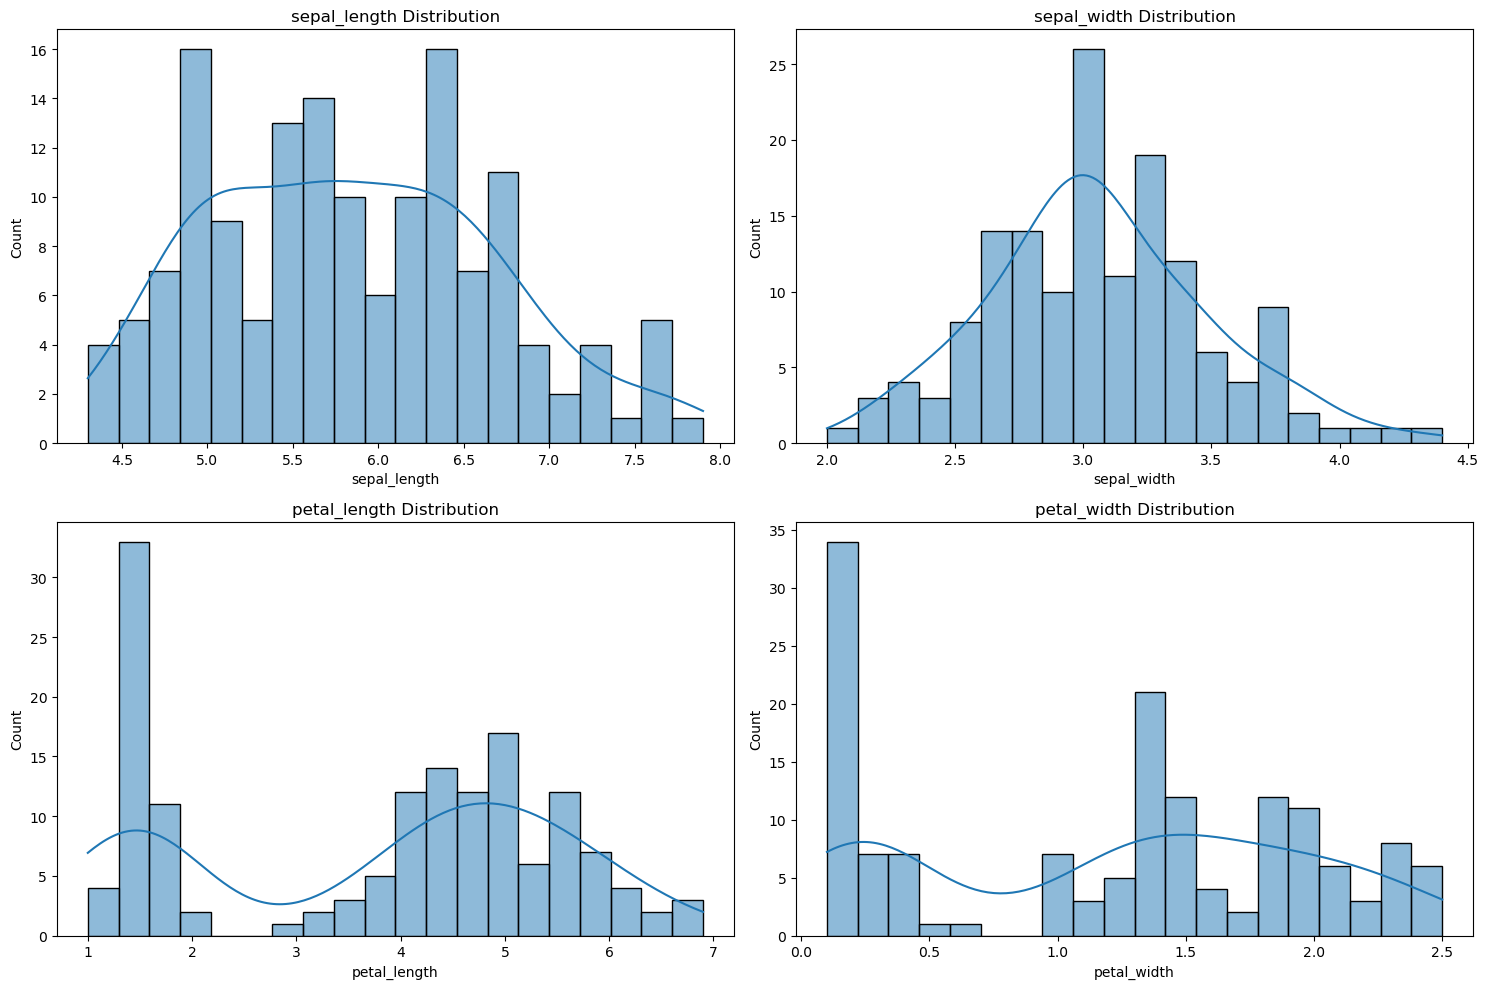

In [6]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create histograms for each numeric feature
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris[feature], kde=True, bins=20)
    plt.title(f'{feature} Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### 3.Create Boxplots for Each Feature

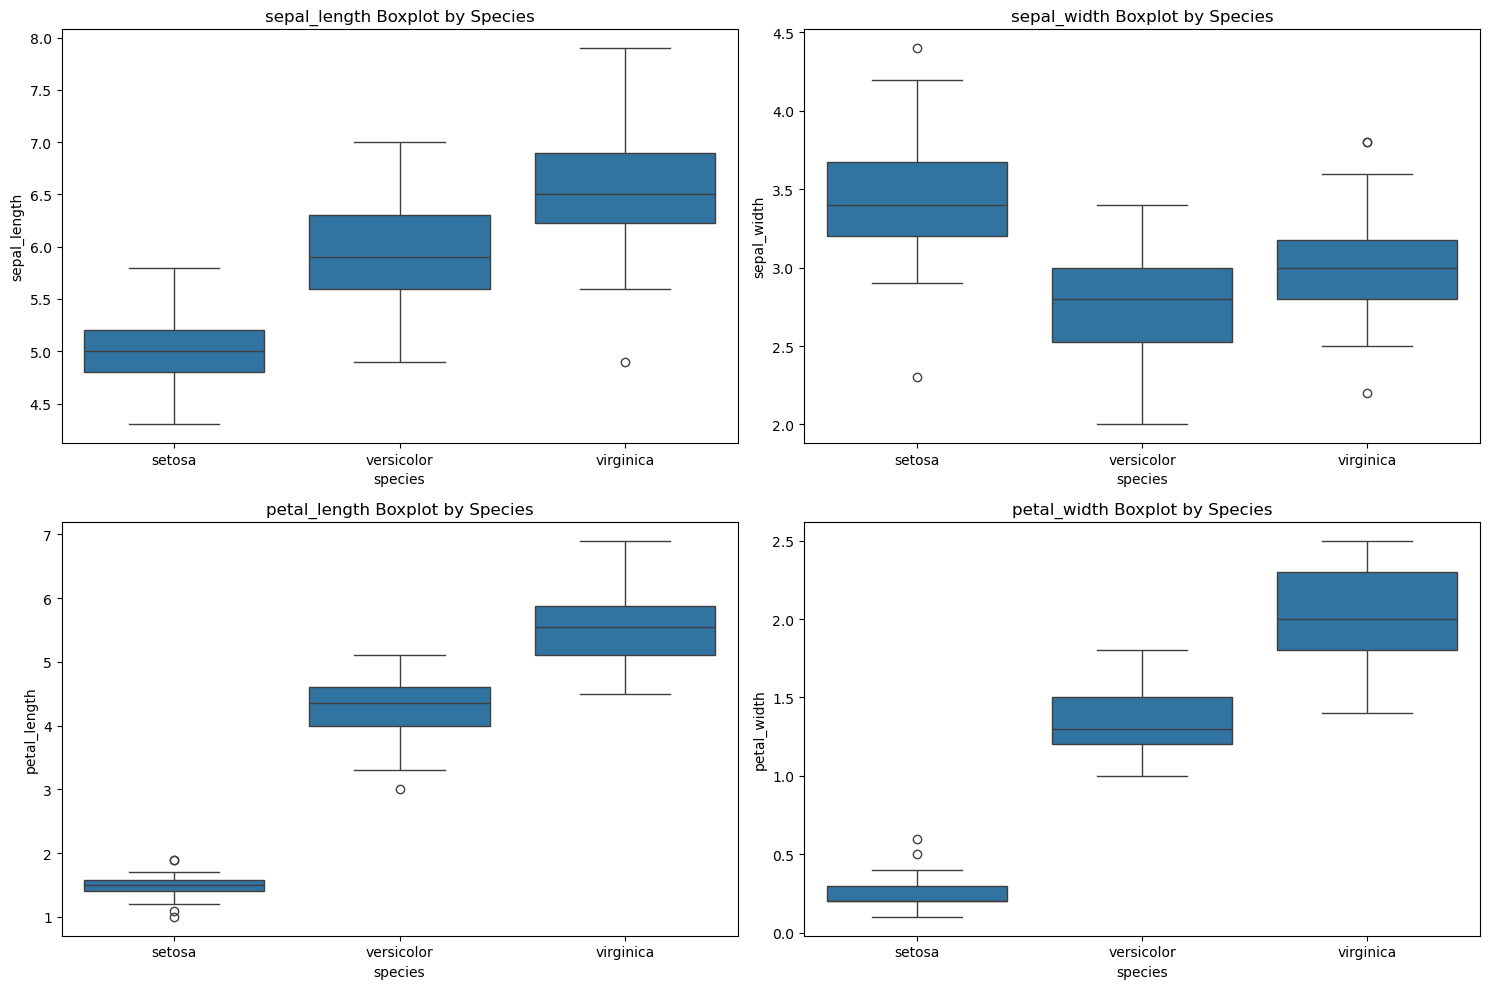

In [7]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=iris)
    plt.title(f'{feature} Boxplot by Species')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### 4.Compare Distributions and Identify Outliers

##### 1.Compare Distributions Using Histograms

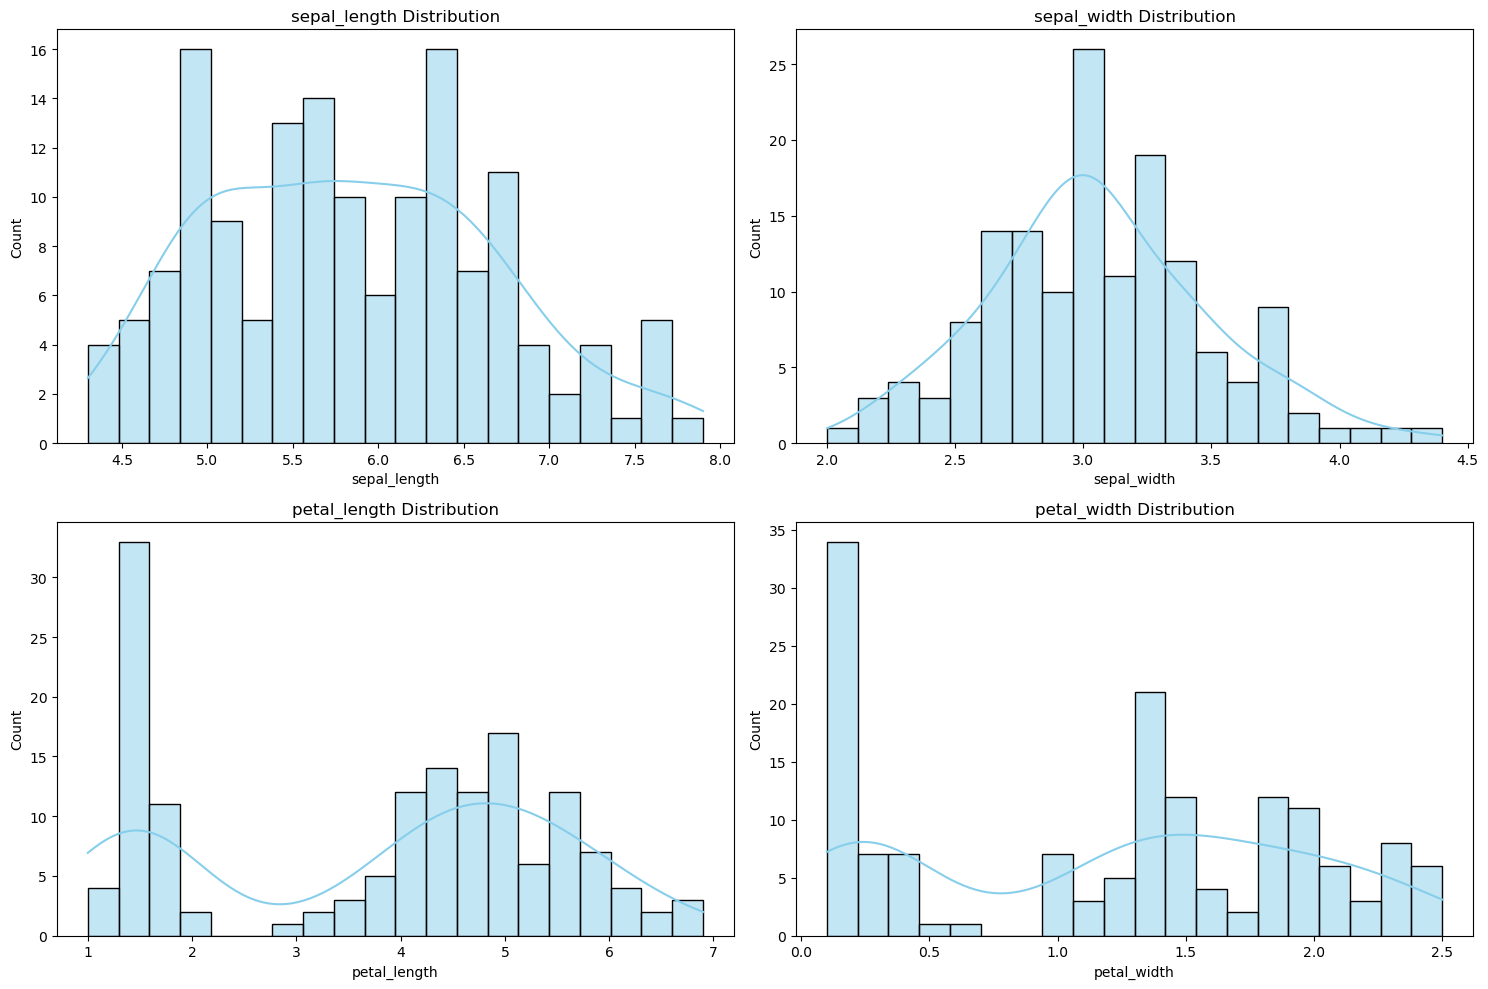

In [8]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create histograms with KDE for each numeric feature
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris[feature], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{feature} Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


##### 2.Compare Distributions Using Boxplots

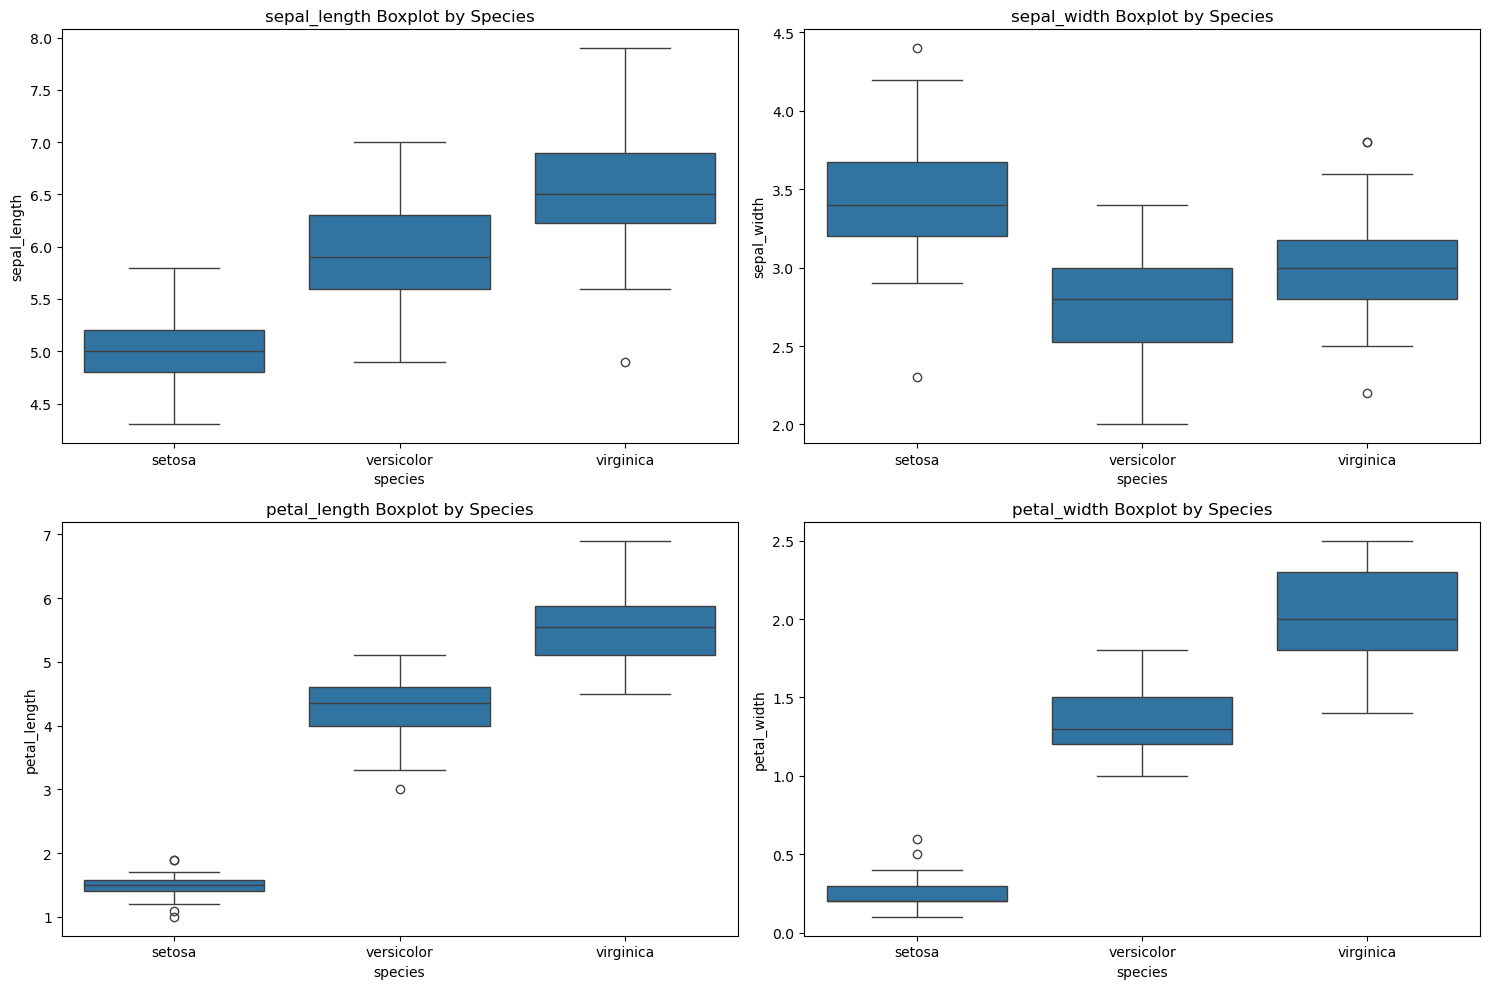

In [9]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=iris)
    plt.title(f'{feature} Boxplot by Species')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


##### 3.Identifying Outliers

In [10]:
# Function to identify outliers based on IQR
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return outliers

# Check for outliers in each feature
for feature in features:
    outliers = identify_outliers(iris, feature)
    print(f"Outliers in {feature}:")
    print(outliers[[feature, 'species']])  # Display outlier values along with species
    print("-" * 40)


Outliers in sepal_length:
Empty DataFrame
Columns: [sepal_length, species]
Index: []
----------------------------------------
Outliers in sepal_width:
    sepal_width     species
15          4.4      setosa
32          4.1      setosa
33          4.2      setosa
60          2.0  versicolor
----------------------------------------
Outliers in petal_length:
Empty DataFrame
Columns: [petal_length, species]
Index: []
----------------------------------------
Outliers in petal_width:
Empty DataFrame
Columns: [petal_width, species]
Index: []
----------------------------------------


In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
